# Mini-batch stochastic gradient descent and momentum

Your task will be to implement SGD with and without momentum for a binary logistic regression classifier.

As usual, the logistic regression model is defined as follows

$p_1 = p(x;w) = \sigma(w^T x),$

$p_2=(1 - p).$

The log likelihood for each of the training samples is given by:
\begin{equation*}
L(x_i;w)=  y_i \text{log } p(x_i;w) + (1-y_i) \text{log } (1-p(x_i;w)),
\end{equation*}

and the gradient for a set of training samples combined into a matrix $X$ can be expressed as:

\begin{equation*}
\frac{\partial L}{\partial w} = X^T (y - p).
\end{equation*}

For a minibatch of the size $N$, the average gradient over the samples of the minibatch $X_{minibatch}$ is given by:

\begin{equation*}
g = \frac{1}{N} \frac{\partial L}{\partial w} = \frac{1}{N} \text{ } X_{minibatch}^T (y - p),
\end{equation*}

So, the SGD update for the negative log-likelihood is given by

\begin{equation*}
w_{new} = w + g.
\end{equation*}

So, your task is to implement the following two methods:

1. Mini-batch SGD
2. Mini-batch SGD with momentum.

Use the same dataset with handwritten digits. Try to play with the batch sizes and learning rates to achieve the fastest convergence. Try different momentum values, e.g. 0.5, 0.6, ..., 0.9.

You are expected to produce the plots for the training set loss value and accuracy similar to the examples below.
So, you need to plot three curves (train set objective, train set accuracy, test set accuracy) for each of the methods.
Report only the best result for each of the methods among with its parameters like batch size and learning rate.

The the structure of the code might look as follows.

**Bonus**

Implement one of more of the more advanced methods that you like most. It could be Adagrad, RMSProp or ADAM.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from scipy.misc import derivative

# The digits dataset
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
dataset = np.array(list(zip(data, digits.target)))

np.random.shuffle(dataset)
train_index = int(n_samples * 0.8)

train = dataset[:train_index]
test = dataset[train_index:]

x_train = np.stack(train[:, 0])
y_train_n = np.stack(train[:, 1])

x_test = np.stack(test[:, 0])
y_test_n = np.stack(test[:, 1])

print(train.shape, test.shape, dataset.shape)

(1437, 2) (360, 2) (1797, 2)


In [2]:
def g(x):
    return np.tanh(x)

def g_grad(x): 
    return 1 - np.tanh(x) ** 2

def softmax(x):
    # numpy nots let to multiply vector with matrix row by row with this way
    return (np.exp(x).T / np.sum(np.exp(x), axis=1)).T

def identifier(y, size):
    _cat = np.zeros(size)
    _cat[y] = 1
    return _cat
   
def network(x, theta):
    W1 = theta[0]
    b1 = theta[1]
    
    W2 = theta[2]
    b2 = theta[3]
    
    z1 = x.dot(W1) + b1
    h1 = g(z1)
    z2 = h1.dot(W2) + b2
    p = softmax(z2)
    
    return p

def compute_gradient(x, y, theta):
    W1 = theta[0]
    b1 = theta[1]
    
    W2 = theta[2]
    b2 = theta[3]
    
    z1 = x.dot(W1) + b1
    h1 = g(z1)
    z2 = h1.dot(W2) + b2
    p = softmax(z2)
    
    L = - 1 / y.shape[0] * np.sum(y * np.log(p))
    
    dLz2 = p - y
    
    dLW2 = h1.T.dot(dLz2)
    dLb2 = np.average(dLz2, axis=0)
    
    dLh1 = dLz2.dot(W2.T) 
    dLz1 = dLh1 * g_grad(z1)
    
    dLW1 = dLz1.T.dot(x)
    dLW1 = dLW1.T
    dLb1 = np.average(dLz1, axis=0)
    
    grad = np.array([dLW1, dLb1, dLW2, dLb2])
    return grad, L

def iterate_minibatches(X, y, batch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    # retrieve indices for each of the minibatches
    for start_idx in range(0, X.shape[0] - batch_size + 1, batch_size):
        batch_indices = indices[start_idx:start_idx + batch_size]
        yield (X[batch_indices], y[batch_indices])
        
def to_categorical(y, size=10):
    cat = []
    for _y in y:
        _cat = identifier(_y, size)
        cat.append(_cat)
        
    return np.array(cat)

def accuracy(y, predicted):
    _arg = list(zip(y, predicted))
    _acc = 0
    
    for _y, _p in _arg:
        _y_m = np.argmax(_y)
        _p_m = np.argmax(_p)
        if _y_m == _p_m:
            _acc += 1

    return _acc / y.shape[0]

epoch: 0, train_loss: 2.0888, train_acc: 0.682, test_acc: 0.664
epoch: 1, train_loss: 0.9788, train_acc: 0.878, test_acc: 0.831
epoch: 2, train_loss: 0.5011, train_acc: 0.932, test_acc: 0.911
epoch: 3, train_loss: 0.3543, train_acc: 0.958, test_acc: 0.939
epoch: 4, train_loss: 0.2460, train_acc: 0.941, test_acc: 0.908
epoch: 5, train_loss: 0.2136, train_acc: 0.965, test_acc: 0.953
epoch: 6, train_loss: 0.1870, train_acc: 0.970, test_acc: 0.956
epoch: 7, train_loss: 0.1584, train_acc: 0.980, test_acc: 0.964
epoch: 8, train_loss: 0.1282, train_acc: 0.985, test_acc: 0.964
epoch: 9, train_loss: 0.1348, train_acc: 0.977, test_acc: 0.950
epoch: 10, train_loss: 0.1193, train_acc: 0.976, test_acc: 0.947
epoch: 11, train_loss: 0.1140, train_acc: 0.985, test_acc: 0.956
epoch: 12, train_loss: 0.0987, train_acc: 0.987, test_acc: 0.961
epoch: 13, train_loss: 0.0879, train_acc: 0.988, test_acc: 0.969
epoch: 14, train_loss: 0.0818, train_acc: 0.991, test_acc: 0.967
epoch: 15, train_loss: 0.0806, trai

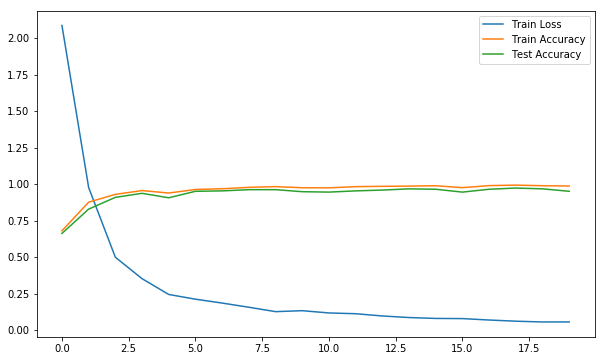

In [3]:
# the schematic structure of the code for mini-batch gradient descent looks as follows
n_batch = 10; # size of the batch, e.g. 4,8
n_epoch = 20;
learning_rate = 3e-4
momentum = 0.9

y_train = to_categorical(y_train_n)
y_test = to_categorical(y_test_n)

W1 = np.random.random((x_train.shape[1], 20)) * 1e-3
b1 = np.random.random(20) * 1e-3

W2 = np.random.random((20, 10)) * 1e-3
b2 = np.random.random(10) * 1e-3

theta = np.array([W1, b1, W2, b2])

train_loss = []
train_acc = []
test_acc = []

for i in range(n_epoch):
    loss_train = []
    v = 0

    train_set = iterate_minibatches(x_train, y_train, n_batch)
    
    for x_batch, y_batch in train_set:
        grad, loss_val = compute_gradient(x_batch, y_batch, theta)
        
        # update the gradient with/without momentum
        # It's interesting. When I use momentum, 
        # I should decrese learning rate to work properly. Makes sense
        v = momentum * v + learning_rate * grad

        theta = theta - v;

        loss_train.append(loss_val)

    p_train = network(x_train, theta)
    acc_train = accuracy(y_train, p_train)
    
    p_test = network(x_test, theta)
    acc_test = accuracy(y_test, p_test)
    
    train_loss.append(np.average(loss_train))
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    
    print('epoch: {}, train_loss: {:.4f}, train_acc: {:.3f}, test_acc: {:.3f}'.format(i, np.average(loss_train), acc_train, acc_test))

    
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.legend()

In [4]:
# you are expected to produce train versus test set accuracy plots for each of the methods